In [223]:
#EJ1
#importo las librerias necesarias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [224]:

#subo los dos data frames
df_2005 = pd.read_stata("C:/Users/morad/OneDrive/Desktop/CIENCIA DE DATOS/GitHub/ciencia_de_datos_G16/ciencia_de_datos_G16_TP1/datos/usu_individual_t105.dta")
df_2025 = pd.read_excel("C:/Users/morad/OneDrive/Desktop/CIENCIA DE DATOS/GitHub/ciencia_de_datos_G16/ciencia_de_datos_G16_TP1/datos/usu_individual_T125.xls.xlsx")

In [ ]:
#####################    PARTE UNO #########################################

In [226]:

#verifico que se haya subido bien el de 2005
df_2005.sample(5)

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
24036,245428,1.0,1.0,Sí,2005.0,1er. Trimestre,NEA,N,Formosa,236.0,...,07,07,09,,08,09,0.0,0.0,0.0,00000
42833,272760,1.0,1.0,Sí,2005.0,1er. Trimestre,Pampeana,S,Mar del Plata - Batán,265.0,...,04,04,04,03,,03,0.0,0.0,0.0,00000
22082,149713,1.0,4.0,Sí,2005.0,1er. Trimestre,NEA,N,Corrientes,370.0,...,01,01,02,,01,02,0.0,0.0,0.0,00000
16611,145347,1.0,4.0,Sí,2005.0,1er. Trimestre,NOA,S,Gran Tucumán - Tafí Viejo,175.0,...,02,03,03,02,,03,0.0,0.0,0.0,00000
26700,138178,1.0,2.0,Sí,2005.0,1er. Trimestre,Cuyo,N,San Luis - El Chorrillo,209.0,...,07,08,08,,08,09,0.0,0.0,0.0,00000


In [227]:

#verifico que haya subido bien la de 2025
df_2025.sample(5)

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V21_03_M,V22_01_M,V22_02_M,V22_03_M,P_DECCF,P_RDECCF,P_GDECCF,P_PDECCF,P_IDECCF,P_ADECCF
30220,TQRMNOPXTHMNLQCDEHJGH00880568,2025,1,1,5,0,40,S,23,436,...,0,0,0,0,3.0,4.0,3.0,NaN,3.0,3.0
1591,TQRMNOTTWHMMLOCDEFIAH00877819,2025,1,1,1,1,43,S,2,656,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
23107,TQRMNORUVHKOOMCDEIJAH00859063,2025,1,1,1,1,1,S,33,3046,...,0,0,70000,0,NaN,NaN,NaN,NaN,NaN,NaN
24325,TQRMNOPSYHMOLMCDEFMDB00880359,2025,1,1,2,1,43,N,6,130,...,0,0,0,0,10.0,10.0,NaN,10.0,10.0,10.0
13124,TQRMNOPQUHLOKPCDEGOIH00859395,2025,1,1,3,1,40,N,18,270,...,0,0,0,0,4.0,4.0,NaN,4.0,4.0,5.0


In [228]:
#Los nombres de las variables en df_2005 estan en minuscula y en df_2025 estan en mayuscula. 
#Estandarizo poniendo todo en mayuscula
df_2005.columns = df_2005.columns.str.upper()


In [229]:
df_2005.sample(3)

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PJ1_1,PJ2_1,PJ3_1,IDIMPP
39349,264195,1.0,7.0,Sí,2005.0,1er. Trimestre,Pampeana,S,Gran Córdoba,505.0,...,01,01,01,01,,01,0.0,0.0,0.0,00000
13576,128226,1.0,1.0,Sí,2005.0,1er. Trimestre,NOA,N,Salta,272.0,...,02,02,03,,02,03,0.0,0.0,0.0,00000
15772,203089,1.0,3.0,Sí,2005.0,1er. Trimestre,NOA,N,La Rioja,193.0,...,05,06,07,,06,06,0.0,0.0,0.0,00000


In [230]:
#EJ2 - A
# Ahora voy a estandarizar region en ambas bases porque en 2005 esta en palabrs y en 2025 esta en numero. Primero pongo todo en un mismo formato en 2005 asi queda todo en mauscula y sin espacios demas para que sea mas facil armar el diccionario
df_2005["REGION"] = df_2005["REGION"].str.strip().str.upper()


In [231]:
# Hago un diccionario de las etiquetas y el numero que quiero que aparezca en cada etiqueta para que quede igual en las dos bases de datos
region_map = {
    "GRAN BUENOS AIRES": 1,
    "NOA": 40,
    "NEA": 41,
    "CUYO": 42,
    "PAMPEANA": 43,
    "PATAGÓNICA": 44  
}

# Mapear
df_2005["REGION"] = df_2005["REGION"].map(region_map)


In [232]:
#verifico que haya funcionado
df_2005.sample(3)

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PJ1_1,PJ2_1,PJ3_1,IDIMPP
40180,207470,1.0,5.0,0.0,2005.0,1er. Trimestre,43,N,Concordia,35.0,...,01,01,01,,01,01,0.0,0.0,0.0,00000
46594,209109,1.0,4.0,Sí,2005.0,1er. Trimestre,44,N,Ushuaia - Río Grande,157.0,...,04,04,03,,05,02,0.0,0.0,0.0,00100
20932,193272,1.0,4.0,Sí,2005.0,1er. Trimestre,41,N,Gran Resistencia,212.0,...,04,05,06,,05,07,0.0,0.0,0.0,00000


In [233]:
#Ahora que ya esta estandarizado el formato de los datos de region
#Elijo una region, 44 (patagonica)
# Filtrar solamente la región 44 en ambos dataframes
df_2005 = df_2005[df_2005["REGION"] == 44]
df_2025 = df_2025[df_2025["REGION"] == 44]

# Veo cuántas filas quedaron en cada base
print("Filas en df_2005 (Región 44):", len(df_2005))
print("Filas en df_2025 (Región 44):", len(df_2025))


Filas en df_2005 (Región 44): 3229
Filas en df_2025 (Región 44): 5359


In [234]:
#Perfecto. Ahora tengo que elegir 15 variables. Para esto veo que variables hay en cada base y las busco en el manual para elegir las 7 que quiero ademas de año
# Listado de variables de cada base
print("Variables en df_2005:")
print(list(df_2005.columns))

print("\nVariables en df_2025:")
print(list(df_2025.columns))


Variables en df_2005:
['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1',

In [235]:
#EJ 2 - B 
#Variables obligatorias: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF
#Variables elegidas: ANO4, CAT_OCUP, PP02H, PP02I, PP03C, PP03D, PP03G
#AHORA SACO TODAS LAS COLUMANS MENOS LAS QUE ELEGI Y LAS OBLIGATORIAS

# Hago una lista de variables seleccionadas
vars_seleccionadas = [
    "CH04", "CH06", "CH07", "CH08", "NIVEL_ED", 
    "ESTADO", "CAT_INAC", "IPCF",
    "CAT_OCUP", "PP02H", "PP02I", "PP03C", 
    "PP03D", "PP03G", "ANO4"
]

# Me quedo solo con esas variables en cada dataframe
df_2005 = df_2005[vars_seleccionadas]
df_2025 = df_2025[vars_seleccionadas]


In [236]:
#veo que haya funcionado
df_2005.sample(45)

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,CAT_OCUP,PP02H,PP02I,PP03C,PP03D,PP03G,ANO4
46216,Varón,57.0,Casado,Obra social (incluye PAMI),Superior Universitaria Incompleta,Ocupado,0.0,833.333333,Obrero o empleado,0.0,0.0,...un sólo empleo/ocupación/actividad?,0.0,No,2005.0
46150,Mujer,53.0,Casado,Obra social (incluye PAMI),Primaria Completa,Inactivo,Ama de casa,233.333333,0.0,No,No,0.0,0.0,0.0,2005.0
46305,Mujer,1.0,Soltero,Obra social (incluye PAMI),Sin instrucción,Menor de 10 años,Menor de 6 años,300.000000,0.0,0.0,0.0,0.0,0.0,0.0,2005.0
44412,Mujer,61.0,Casado,Obra social (incluye PAMI),Secundaria Completa,Inactivo,Jubilado/pensionado,1700.000000,0.0,No,No,0.0,0.0,0.0,2005.0
44200,Varón,29.0,Unido,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,0.0,1152.500000,Obrero o empleado,0.0,0.0,...un sólo empleo/ocupación/actividad?,0.0,No,2005.0
44490,Varón,45.0,Separado o divorciado,No paga ni le descuentan,Secundaria Completa,Ocupado,0.0,1960.000000,Obrero o empleado,0.0,0.0,...un sólo empleo/ocupación/actividad?,0.0,No,2005.0
45621,Varón,4.0,Soltero,Obra social (incluye PAMI),Sin instrucción,Menor de 10 años,Menor de 6 años,250.200000,0.0,0.0,0.0,0.0,0.0,0.0,2005.0
46416,Mujer,63.0,Casado,Obra social (incluye PAMI),Primaria Incompleta (incluye educación especial),Ocupado,0.0,810.000000,Cuenta propia,0.0,0.0,...un sólo empleo/ocupación/actividad?,0.0,No,2005.0
45364,Varón,Menos de 1 año,Soltero,Obra social (incluye PAMI),Sin instrucción,Menor de 10 años,Menor de 6 años,192.500000,0.0,0.0,0.0,0.0,0.0,0.0,2005.0
46395,Varón,56.0,Soltero,No paga ni le descuentan,Sin instrucción,Ocupado,0.0,1000.000000,Cuenta propia,0.0,0.0,...un sólo empleo/ocupación/actividad?,0.0,Sí,2005.0


In [237]:
df_2025.sample(5)

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,CAT_OCUP,PP02H,PP02I,PP03C,PP03D,PP03G,ANO4
8784,1,46,5,1.0,4,1,0,0.00,3,0,0,1.0,0.0,2.0,2025
3353,2,66,4,1.0,4,3,1,600000.00,0,2,2,NaN,NaN,NaN,2025
28268,1,39,1,1.0,4,1,0,766666.67,3,0,0,1.0,0.0,2.0,2025
15277,1,2,5,1.0,7,4,5,0.00,0,0,0,NaN,NaN,NaN,2025
23429,1,61,3,1.0,2,1,0,2250000.00,3,0,0,1.0,0.0,2.0,2025


In [238]:

# Exportá TODO el df_2005 (ya con tus 15 variables) a HTML
df_2005.to_html("df_2005_patagonia.html", index=False)
print("Listo: df_2005_patagonia.html")


Listo: df_2005_patagonia.html


In [239]:
#Okey ahor atengo que estandarizar todosm los tipos de datos para que qqueden todos con codigos y no etiquetas. 
#Primero pongo todo en mayus, le saco las tiled, lo saco los espacios extra, y pongo todo igual para que sea mas facil armar los diccionarios
#Armo los diccionarios
#Para las variables binarias: PP0s2H, PP02I, PP03C y PP03G, conviero lo SI en 1, los NO en 0 y los 0 en NA porque no son validos
import unicodedata

# --- normalizador (quita tildes, mayúsculas, trim) ---
def norm(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().upper()
    s = ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')
    return s

# --- mapper general con opción de tratar "0"/"0.0" como NA ---
def map_with_dict(series, mapping, treat_zero_as_na=False):
    # tokenizamos todo como string normalizado para mapear números y textos en un solo paso
    s_norm = series.map(lambda v: np.nan if pd.isna(v) else norm(v))
    out = s_norm.map(mapping)

    if treat_zero_as_na:
        # Solo los ceros "originales" (tokens "0" o "0.0") van a NA *sin tocar los "NO" mapeados a 0*
        zero_token = s_norm.isin(["0", "0.0"])
        out = out.mask(zero_token, pd.NA)

    return out.astype("Int64")

# ================== DICCIONARIOS ==================

# Binarias (Sí/No) -> Sí=1, No=0 ; incluir formas numéricas
SI_NO_DICT = {
    "SI": 1, "SI.": 1, "SÍ": 1, "SÍ.": 1,
    "NO": 0, "NO.": 0,
    "1": 1, "1.0": 1,
    "2": 0, "2.0": 0,
    "0": 0, "0.0": 0   # se pasarán a NA con treat_zero_as_na=True
}

# CH04 - Sexo
CH04_MAP = {
    "VARON": 1, "HOMBRE": 1, "1": 1, "1.0": 1,
    "MUJER": 2, "2": 2, "2.0": 2
}

# CH07 - Estado conyugal
CH07_MAP = {
    "UNIDO": 1, "1": 1, "1.0": 1,
    "CASADO": 2, "2": 2, "2.0": 2,
    "SEPARADO O DIVORCIADO": 3, "SEPARADO": 3, "DIVORCIADO": 3, "3": 3, "3.0": 3,
    "VIUDO": 4, "4": 4, "4.0": 4,
    "SOLTERO": 5, "SOLTERA": 5, "5": 5, "5.0": 5
}

# CH08 - Cobertura de salud
CH08_MAP = {
    "OBRA SOCIAL (INCLUYE PAMI)": 1, "1": 1, "1.0": 1,
    "MUTUAL/PREPAGA/SERVICIO DE EMERGENCIA": 2, "2": 2, "2.0": 2,
    "PLANES Y SEGUROS PUBLICOS": 3, "3": 3, "3.0": 3,
    "NO PAGA NI LE DESCUENTAN": 4, "4": 4, "4.0": 4,
    "NS./NR.": 9, "NS/NR": 9, "9": 9, "9.0": 9,
    "OBRA SOCIAL Y MUTUAL/PREPAGA/SERVICIO DE EMERGENCIA": 12, "12": 12, "12.0": 12,
    "OBRA SOCIAL Y PLANES Y SEGUROS PUBLICOS": 13, "13": 13, "13.0": 13,
    "MUTUAL/PREPAGA/SERVICIO DE EMERGENCIA Y PLANES Y SEGUROS PUBLICOS": 23, "23": 23, "23.0": 23,
    "OBRA SOCIAL Y MUTUAL/PREPAGA/SERVICIO DE EMERGENCIA Y PLANES Y SEGUROS PUBLICOS": 123, "123": 123, "123.0": 123
}

# NIVEL_ED
NIVEL_ED_MAP = {
    "PRIMARIA INCOMPLETA (INCLUYE EDUCACION ESPECIAL)": 1, "1": 1, "1.0": 1,
    "PRIMARIA COMPLETA": 2, "2": 2, "2.0": 2,
    "SECUNDARIA INCOMPLETA": 3, "3": 3, "3.0": 3,
    "SECUNDARIA COMPLETA": 4, "4": 4, "4.0": 4,
    "SUPERIOR UNIVERSITARIA INCOMPLETA": 5, "5": 5, "5.0": 5,
    "SUPERIOR UNIVERSITARIA COMPLETA": 6, "6": 6, "6.0": 6,
    "SIN INSTRUCCION": 7, "7": 7, "7.0": 7,
    "NS/NR": 9, "9": 9, "9.0": 9
}

# ESTADO
ESTADO_MAP = {
    "ENTREVISTA INDIVIDUAL NO REALIZADA": 0, "0": 0, "0.0": 0,
    "OCUPADO": 1, "1": 1, "1.0": 1,
    "DESOCUPADO": 2, "2": 2, "2.0": 2,
    "INACTIVO": 3, "3": 3, "3.0": 3,
    "MENOR DE 10 ANOS": 4, "MENOR DE 10 AÑOS": 4, "4": 4, "4.0": 4
}
#CAT_INAC
import numpy as np

CAT_INAC_MAP = {
    "JUBILADO/PENSIONADO": 1, "1": 1, "1.0": 1,
    "RENTISTA": 2, "2": 2, "2.0": 2,
    "ESTUDIANTE": 3, "3": 3, "3.0": 3,
    "AMA DE CASA": 4, "4": 4, "4.0": 4,
    "MENOR DE 6 AÑOS": 5, "5": 5, "5.0": 5,
    "DISCAPACITADO": 6, "6": 6, "6.0": 6,
    "OTROS": 7, "7": 7, "7.0": 7,
    "0": np.nan, "0.0": np.nan
}


# CAT_OCUP
CAT_OCUP_MAP = {
    "PATRON": 1, "PATRON/A": 1, "1": 1, "1.0": 1,
    "CUENTA PROPIA": 2, "2": 2, "2.0": 2,
    "OBRERO O EMPLEADO": 3, "3": 3, "3.0": 3,
    "TRABAJADOR FAMILIAR SIN REMUNERACION": 4, "4": 4, "4.0": 4,
    "NS/NR": 9, "9": 9, "9.0": 9,
    "0": np.nan, "0.0": np.nan
}

# PP03C (1 = un solo empleo; 2 = más de uno; 0 = no corresponde -> NA)
PP03C_MAP = {
    "...UN SOLO EMPLEO/OCUPACION/ACTIVIDAD?": 1, "1": 1, "1.0": 1,
    "...MAS DE UN EMPLEO/OCUPACION/ACTIVIDAD?": 2, "2": 2, "2.0": 2,
    "0": 0, "0.0": 0   # se pasará a NA con treat_zero_as_na=True
}

# ================== APLICACIÓN ==================
# df_2005: aplica mapeos de texto -> códigos
df_2005["CH04"]     = map_with_dict(df_2005["CH04"], CH04_MAP)
df_2005["CH06"]     = pd.to_numeric(df_2005["CH06"], errors="coerce").astype("Int64")  # edad ya num.
df_2005["CH07"]     = map_with_dict(df_2005["CH07"], CH07_MAP)
df_2005["CH08"]     = map_with_dict(df_2005["CH08"], CH08_MAP)
df_2005["NIVEL_ED"] = map_with_dict(df_2005["NIVEL_ED"], NIVEL_ED_MAP)
df_2005["ESTADO"]   = map_with_dict(df_2005["ESTADO"], ESTADO_MAP)
df_2005["CAT_INAC"] = map_with_dict(df_2005["CAT_INAC"], CAT_INAC_MAP)
df_2005["CAT_OCUP"] = map_with_dict(df_2005["CAT_OCUP"], CAT_OCUP_MAP)

# Binarias con desambiguación de 0 -> NA
for col in ["PP02H","PP02I","PP03G"]:
    df_2005[col] = map_with_dict(df_2005[col], SI_NO_DICT, treat_zero_as_na=True)

# PP03C: 0 -> NA, 1/2 válidos
df_2005["PP03C"] = map_with_dict(df_2005["PP03C"], PP03C_MAP, treat_zero_as_na=True)

# numéricas directas
df_2005["PP03D"] = pd.to_numeric(df_2005["PP03D"], errors="coerce").astype("Int64")
df_2005["ANO4"]  = pd.to_numeric(df_2005["ANO4"],  errors="coerce").astype("Int64")



In [240]:
df_2005.sample(20)

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,CAT_OCUP,PP02H,PP02I,PP03C,PP03D,PP03G,ANO4
46025,1,49,2,1,6,1,<NA>,1506.000000,2,<NA>,<NA>,1,0,0,2005
44794,2,27,2,1,3,3,4,233.333333,<NA>,0,0,<NA>,0,<NA>,2005
46494,1,48,1,3,2,1,<NA>,112.500000,2,<NA>,<NA>,1,0,0,2005
44308,2,8,5,1,1,4,3,185.000000,<NA>,<NA>,<NA>,<NA>,0,<NA>,2005
44909,2,32,3,4,3,1,<NA>,280.000000,2,<NA>,<NA>,1,0,0,2005
45725,1,19,5,4,3,2,<NA>,436.000000,3,<NA>,<NA>,<NA>,0,<NA>,2005
44661,2,10,5,4,1,3,3,87.500000,<NA>,0,0,<NA>,0,<NA>,2005
45702,1,2,5,1,7,4,<NA>,416.666667,<NA>,<NA>,<NA>,<NA>,0,<NA>,2005
44823,1,39,2,4,4,3,7,0.000000,<NA>,1,1,<NA>,0,<NA>,2005
43848,2,41,2,4,1,3,4,241.666667,<NA>,1,1,<NA>,0,<NA>,2005


In [241]:
# Igualo lo de las binarias a la de 2025 para que sea mas facil de entender
binarias = ["PP02H", "PP02I", "PP03G"]

for col in binarias:
    if col in df_2025.columns:
        df_2025[col] = df_2025[col].replace({1: 1, 2: 0})
        df_2025.loc[df_2025[col] == 0, col] = pd.NA
        df_2025[col] = df_2025[col].astype("Int64")

# --- PP03C ---
if "PP03C" in df_2025.columns:
    df_2025.loc[df_2025["PP03C"] == 0, "PP03C"] = pd.NA
    df_2025["PP03C"] = df_2025["PP03C"].astype("Int64")

# --- CH06 (edad): pasar negativos a NA ---
if "CH06" in df_2025.columns:
    df_2025.loc[df_2025["CH06"] < 0, "CH06"] = pd.NA
    df_2025["CH06"] = df_2025["CH06"].astype("Int64")

# --- NUEVO: CAT_INAC y CAT_OCUP: pasar 0 (y "0"/"0.0") a NA ---
for c in ["CAT_INAC", "CAT_OCUP"]:
    if c in df_2025.columns:
        # normalizo a numérico por si vienen strings como "0" o "0.0"
        df_2025[c] = pd.to_numeric(df_2025[c], errors="coerce")
        df_2025.loc[df_2025[c] == 0, c] = pd.NA
        df_2025[c] = df_2025[c].astype("Int64")

# --- Verificación rápida ---
for v in ["CH04","CH06","CH07","CH08","NIVEL_ED","ESTADO","CAT_INAC","IPCF",
          "CAT_OCUP","PP02H","PP02I","PP03C","PP03D","PP03G","ANO4"]:
    if v in df_2025.columns:
        print(v, sorted(pd.Series(df_2025[v].dropna().unique()).tolist())[:20])


CH04 [1, 2]
CH06 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
CH07 [1, 2, 3, 4, 5]
CH08 [1.0, 2.0, 3.0, 4.0, 9.0, 12.0]
NIVEL_ED [1, 2, 3, 4, 5, 6, 7]
ESTADO [0, 1, 2, 3, 4]
CAT_INAC [1, 2, 3, 4, 5, 6, 7]
IPCF [0.0, 15000.0, 24000.0, 25000.0, 26666.67, 37500.0, 39000.0, 40000.0, 44666.67, 50000.0, 54333.33, 58333.33, 59333.33, 60000.0, 67666.67, 73400.0, 75000.0, 76000.0, 81000.0, 82500.0]
CAT_OCUP [1, 2, 3, 4]
PP02H [1]
PP02I [1]
PP03C [1, 2]
PP03D [0.0, 2.0, 3.0, 4.0]
PP03G [1]
ANO4 [2025]


In [242]:
df_2005.sample(10)

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,CAT_OCUP,PP02H,PP02I,PP03C,PP03D,PP03G,ANO4
45663,1,20,5,1,5,3,3,250.000000,<NA>,0,0,<NA>,0,<NA>,2005
46098,2,17,5,1,3,3,3,782.500000,<NA>,0,0,<NA>,0,<NA>,2005
45933,1,17,5,1,2,3,3,533.333333,<NA>,0,0,<NA>,0,<NA>,2005
46474,1,11,5,1,1,3,7,1350.000000,<NA>,0,0,<NA>,0,<NA>,2005
46501,2,48,3,4,3,3,4,110.000000,<NA>,0,0,<NA>,0,<NA>,2005
44836,1,27,2,4,3,1,<NA>,162.500000,3,<NA>,<NA>,1,0,0,2005
45587,1,20,5,1,3,1,<NA>,683.333333,3,<NA>,<NA>,1,0,0,2005
46645,2,54,2,1,2,1,<NA>,632.500000,3,<NA>,<NA>,2,2,1,2005
47024,2,44,2,1,2,3,4,950.000000,<NA>,0,0,<NA>,0,<NA>,2005
46358,1,42,5,4,5,1,<NA>,850.000000,3,<NA>,<NA>,1,0,1,2005


In [243]:
df_2025.sample(10)

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,CAT_OCUP,PP02H,PP02I,PP03C,PP03D,PP03G,ANO4
7508,1,56,5,4.0,2,1,<NA>,480000.00,3,<NA>,<NA>,1,0.0,<NA>,2025
14803,1,50,3,1.0,2,1,<NA>,0.00,3,<NA>,<NA>,1,0.0,<NA>,2025
17036,2,44,5,1.0,4,1,<NA>,525000.00,3,<NA>,<NA>,1,0.0,<NA>,2025
13976,1,6,5,1.0,1,4,3,733333.33,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,2025
40433,1,20,5,1.0,3,3,3,333333.33,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,2025
5077,1,53,5,4.0,4,1,<NA>,0.00,2,<NA>,<NA>,1,0.0,1,2025
23790,1,9,5,1.0,1,4,3,300000.00,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,2025
5018,1,26,5,1.0,5,1,<NA>,700000.00,3,<NA>,<NA>,1,0.0,<NA>,2025
6911,2,62,2,1.0,4,3,1,0.00,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,2025
27519,2,29,1,1.0,4,3,4,250000.00,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,2025


In [244]:
#ahora que esta todo igual, voy a unir las dos bases para tener mi base final
# Concatenamos ambos dataframes
df_final2_0 = pd.concat([df_2005, df_2025], ignore_index=True)

# Verificamos que quedó bien
print(df_final2_0.shape)
print(df_final2_0["ANO4"].value_counts())


(8588, 15)
ANO4
2025    5359
2005    3229
Name: count, dtype: Int64


In [245]:
# Exportar a Excel
out_path = "df_final2_0.xlsx"
df_final2_0.to_excel(out_path, index=False)

print(f"Archivo guardado en: {out_path}")


Archivo guardado en: df_final2_0.xlsx


In [246]:
df_final = df_final2_0

In [247]:
df_final.shape

(8588, 15)

In [248]:
#2b) #hago una tabla con lso datos faltantes
import pandas as pd

# Calcular faltantes por variable y año
missing = df_final.groupby("ANO4").apply(lambda x: x.isna().sum())
missing = missing.T  # variables en filas, años en columnas

# Agregar columna de totales por variable
missing["TOTAL_FALTANTES"] = missing.sum(axis=1)

# Agregar fila de totales por año
missing.loc["TOTAL_FALTANTES"] = missing.sum()

# Mostrar tabla
print(missing)


ANO4              2005   2025  TOTAL_FALTANTES
CH04                 0      0                0
CH06                57     33               90
CH07                 0      0                0
CH08                 0      0                0
NIVEL_ED             0      0                0
ESTADO               2      0                2
CAT_INAC          1706   2456             4162
IPCF                 0      0                0
CAT_OCUP          1868   2943             4811
PP02H             1962   5340             7302
PP02I             1958   5344             7302
PP03C             2088   3182             5270
PP03D                0   3036             3036
PP03G             1948   5168             7116
ANO4                 0      0                0
TOTAL_FALTANTES  11589  27502            39091


C:\Users\morad\AppData\Local\Temp\ipykernel_17092\3541457078.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing = df_final.groupby("ANO4").apply(lambda x: x.isna().sum())


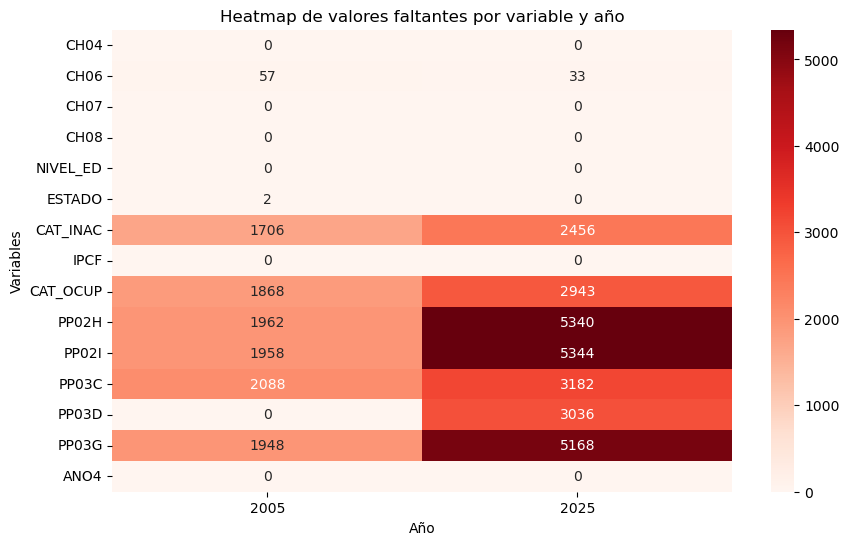

In [249]:
# EJ 2 - C
import matplotlib.pyplot as plt
import seaborn as sns

# Sacamos la fila y columna de totales porque ensucian el gráfico
missing_heatmap = missing.drop("TOTAL_FALTANTES", axis=0, errors="ignore")
missing_heatmap = missing_heatmap.drop("TOTAL_FALTANTES", axis=1, errors="ignore")

# Graficar heatmap
plt.figure(figsize=(10,6))
sns.heatmap(missing_heatmap, annot=True, fmt="d", cmap="Reds")
plt.title("Heatmap de valores faltantes por variable y año")
plt.ylabel("Variables")
plt.xlabel("Año")
plt.show()


In [250]:
 ########################################### PARTE 2 ##################################################

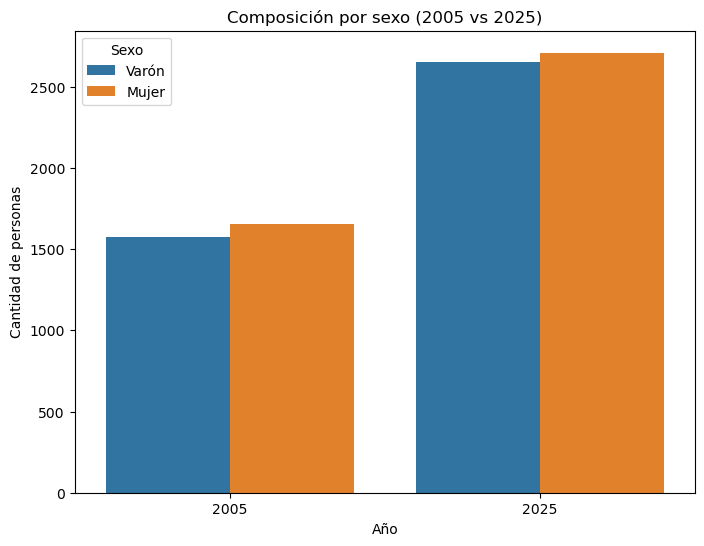

In [251]:
#EJ 3
# Composición por sexo y año
sexo_counts = df_final.groupby(["ANO4", "CH04"]).size().reset_index(name="cantidad")

# Mapeamos etiquetas de sexo
sexo_counts["Sexo"] = sexo_counts["CH04"].map({1: "Varón", 2: "Mujer"})

# Graficar
plt.figure(figsize=(8,6))
sns.barplot(data=sexo_counts, x="ANO4", y="cantidad", hue="Sexo")

plt.title("Composición por sexo (2005 vs 2025)")
plt.ylabel("Cantidad de personas")
plt.xlabel("Año")
plt.show()

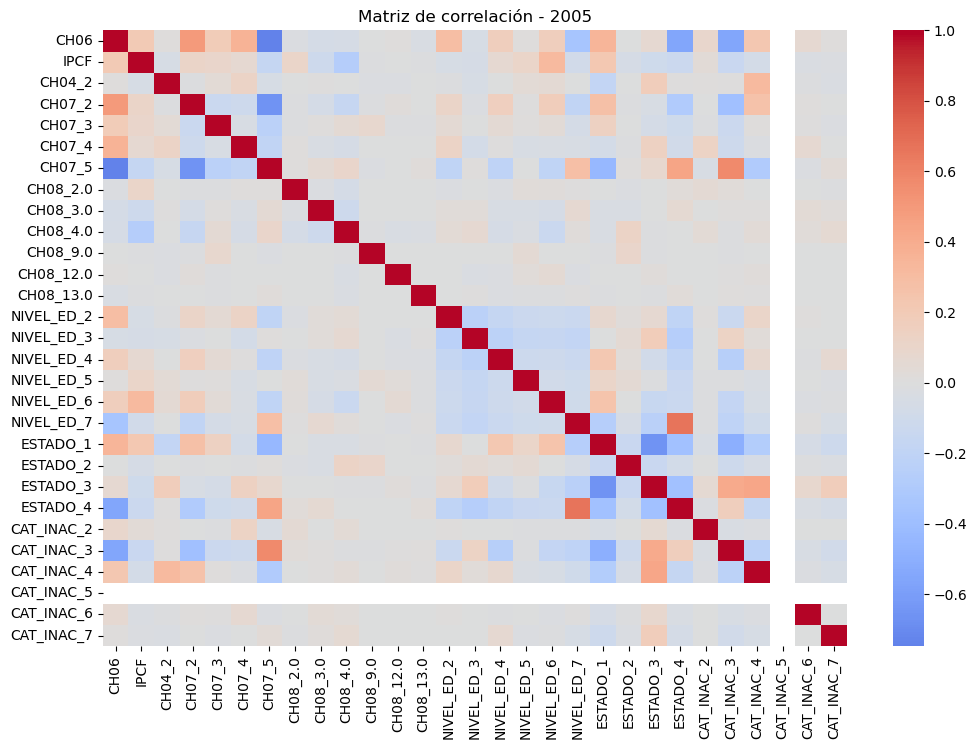

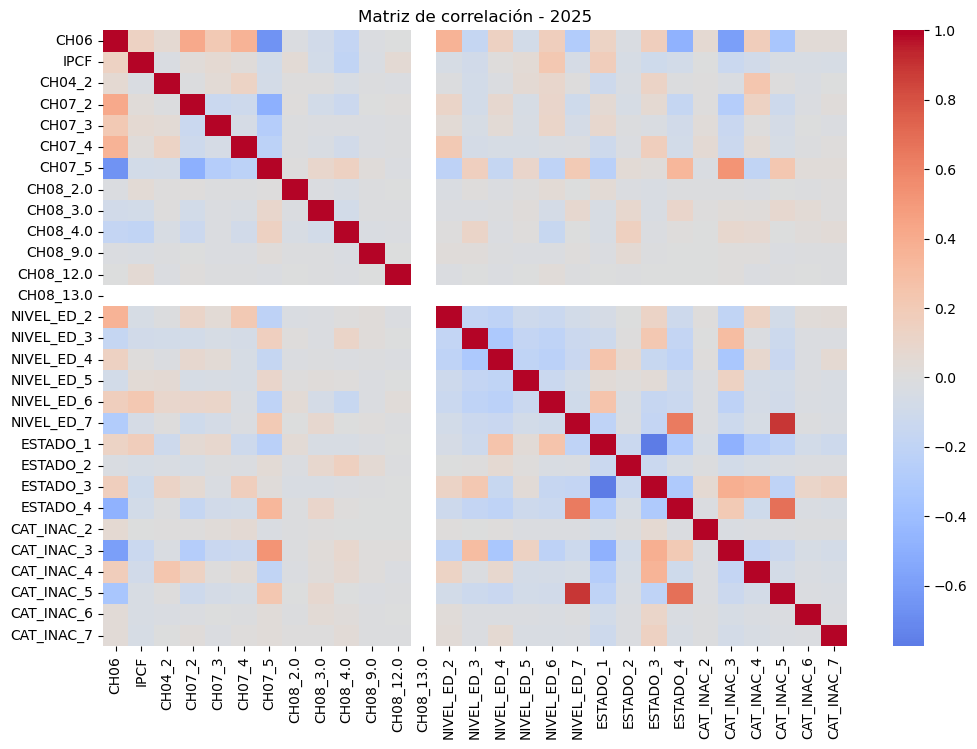

In [252]:
# EJ 4 
# CH04, CH06, CH07, CH08, NIVEL_ED, ESTADO, CAT_INAC_ IPCF
import seaborn as sns
import matplotlib.pyplot as plt

# Filtramos solo las variables de interés
vars_interes = ["CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF"]

df_corr = df_final[vars_interes + ["ANO4"]].copy()

# Crear variables dummies para las categóricas
df_corr_dummies = pd.get_dummies(
    df_corr, 
    columns=["CH04", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC"], 
    drop_first=True
)

# Ahora generamos una matriz de correlación separada para cada año
for year in [2005, 2025]:
    subset = df_corr_dummies[df_corr_dummies["ANO4"] == year].drop(columns=["ANO4"])
    corr_matrix = subset.corr()

    # Graficar heatmap de correlación
    plt.figure(figsize=(12,8))
    sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
    plt.title(f"Matriz de correlación - {year}")
    plt.show()


    

In [ ]:
######################### PARTE 3 #########################################################################333

In [253]:
#EJ 5
#subo los dos data frames
df_2005_2 = pd.read_stata("C:/Users/morad/OneDrive/Desktop/CIENCIA DE DATOS/GitHub/ciencia_de_datos_G16/ciencia_de_datos_G16_TP1/datos/usu_individual_t105.dta")
df_2025_2 = pd.read_excel("C:/Users/morad/OneDrive/Desktop/CIENCIA DE DATOS/GitHub/ciencia_de_datos_G16/ciencia_de_datos_G16_TP1/datos/usu_individual_T125.xls.xlsx")

In [254]:
import pandas as pd
import numpy as np

# === 1) Normalizar nombres a MAYÚSCULAS (evita problemas entre años) ===
df_2005_2.columns = [c.upper() for c in df_2005_2.columns]
df_2025_2.columns = [c.upper() for c in df_2025_2.columns]

# === 2) Detectar y estandarizar nombre de ITF (a veces viene como P47T) ===
def detectar_itf(cols):
    for c in ["ITF", "P47T", "ITF_TOT", "ITF_HOGAR"]:
        if c in cols:
            return c
    return None

itf_2005 = detectar_itf(df_2005_2.columns)
itf_2025 = detectar_itf(df_2025_2.columns)

if itf_2005 is None or itf_2025 is None:
    raise KeyError("No encuentro la columna de ITF (o equivalente) en alguna base.")

df_2005_2 = df_2005_2.rename(columns={itf_2005: "ITF"})
df_2025_2 = df_2025_2.rename(columns={itf_2025: "ITF"})

# Asegurar numérico
df_2005_2["ITF"] = pd.to_numeric(df_2005_2["ITF"], errors="coerce")
df_2025_2["ITF"] = pd.to_numeric(df_2025_2["ITF"], errors="coerce")

# === 3) Asegurar que ANO4 exista; si no, setearlo manualmente ===
if "ANO4" not in df_2005_2.columns:
    df_2005_2["ANO4"] = 2005
if "ANO4" not in df_2025_2.columns:
    df_2025_2["ANO4"] = 2025

# Tipos recomendados
for d in (df_2005_2, df_2025_2):
    for col in ["ANO4", "ESTADO", "CAT_INAC"]:
        if col in d.columns:
            d[col] = pd.to_numeric(d[col], errors="coerce").astype("Int64")

# === 4) Quedarnos solo con las columnas pedidas ===
keep_cols = ["ANO4", "ITF", "ESTADO", "CAT_INAC"]
df_2005_min = df_2005_2[[c for c in keep_cols if c in df_2005_2.columns]].copy()
df_2025_min = df_2025_2[[c for c in keep_cols if c in df_2025_2.columns]].copy()

# === 5) Unir ambas bases ===
df_itf_act = pd.concat([df_2005_min, df_2025_min], ignore_index=True)

# === 6) Bandera: respondieron ITF (1 si ITF>0 y no NaN; 0 si ITF==0 o NaN) ===
df_itf_act["respondio_ITF"] = np.where(df_itf_act["ITF"].notna() & (df_itf_act["ITF"] > 0), 1, 0).astype("int8")

# === 7) Bases pedidas por consigna ===
respondieron   = df_itf_act.query("respondio_ITF == 1").copy()
norespondieron = df_itf_act.query("respondio_ITF == 0").copy()

# === 8) Resúmenes útiles para el informe ===
# a) Respondieron vs no respondieron por año
resumen_itf = (
    df_itf_act.groupby(["ANO4","respondio_ITF"]).size()
      .unstack(fill_value=0)
      .rename(columns={0:"norespondieron_ITF", 1:"respondieron_ITF"})
      .reset_index()
)
resumen_itf["tasa_noresp"] = resumen_itf["norespondieron_ITF"] / (
    resumen_itf["norespondieron_ITF"] + resumen_itf["respondieron_ITF"]
)

# b) Faltantes de condición de actividad (ESTADO) por año
faltantes_estado = df_itf_act.groupby("ANO4")["ESTADO"].apply(lambda s: s.isna().sum()).reset_index(name="faltantes_ESTADO")

print("Resumen ITF por año:")
print(resumen_itf)
print("\nFaltantes de ESTADO por año:")
print(faltantes_estado)



Resumen ITF por año:
respondio_ITF  ANO4  norespondieron_ITF  respondieron_ITF  tasa_noresp
0              2005                 438             46592     0.009313
1              2025               12053             33372     0.265338

Faltantes de ESTADO por año:
   ANO4  faltantes_ESTADO
0  2005             47030
1  2025                 0


In [255]:
df_itf_act.sample(10)

,ANO4,ITF,ESTADO,CAT_INAC,respondio_ITF
17521,2005,1200.0,<NA>,<NA>,1
41501,2005,1600.0,<NA>,<NA>,1
82977,2025,1100000.0,4,5,1
79118,2025,1640000.0,1,0,1
8216,2005,1020.0,<NA>,<NA>,1
73963,2025,0.0,1,0,0
39353,2005,700.0,<NA>,<NA>,1
14695,2005,1630.0,<NA>,<NA>,1
55018,2025,1048686.0,3,3,1
50879,2025,0.0,3,4,0


In [256]:
#EJ5
# Base con todos los que respondieron ITF (respondio_ITF == 1)
respondieron = df_itf_act[df_itf_act["respondio_ITF"] == 1].copy()

# Base con todos los que NO respondieron ITF (respondio_ITF == 0)
norespondieron = df_itf_act[df_itf_act["respondio_ITF"] == 0].copy()

# Chequear tamaños
print("Respondieron:", respondieron.shape)
print("No respondieron:", norespondieron.shape)

# Si querés dividir además por año:
respondieron_2005 = respondieron[respondieron["ANO4"] == 2005]
respondieron_2025 = respondieron[respondieron["ANO4"] == 2025]

norespondieron_2005 = norespondieron[norespondieron["ANO4"] == 2005]
norespondieron_2025 = norespondieron[norespondieron["ANO4"] == 2025]

print("Respondieron 2005:", respondieron_2005.shape)
print("Respondieron 2025:", respondieron_2025.shape)
print("No respondieron 2005:", norespondieron_2005.shape)
print("No respondieron 2025:", norespondieron_2025.shape)


Respondieron: (79964, 5)
No respondieron: (12491, 5)
Respondieron 2005: (46592, 5)
Respondieron 2025: (33372, 5)
No respondieron 2005: (438, 5)
No respondieron 2025: (12053, 5)


In [257]:
respondieron.sample(10)

,ANO4,ITF,ESTADO,CAT_INAC,respondio_ITF
24809,2005,1122.0,<NA>,<NA>,1
58220,2025,1900000.0,1,0,1
26305,2005,1650.0,<NA>,<NA>,1
13356,2005,2775.0,<NA>,<NA>,1
28173,2005,620.0,<NA>,0,1
52274,2025,1680000.0,1,0,1
14686,2005,1370.0,<NA>,<NA>,1
48413,2025,915000.0,3,4,1
13337,2005,725.0,<NA>,0,1
31110,2005,3100.0,<NA>,<NA>,1


In [258]:
norespondieron.sample(10)

,ANO4,ITF,ESTADO,CAT_INAC,respondio_ITF
64702,2025,0.0,1,0,0
85852,2025,0.0,1,0,0
75587,2025,0.0,3,1,0
89433,2025,0.0,1,0,0
49372,2025,0.0,3,4,0
58044,2025,0.0,1,0,0
88337,2025,0.0,4,3,0
76327,2025,0.0,1,0,0
53393,2025,0.0,1,0,0
58313,2025,0.0,1,0,0


In [259]:
# Exportar a excel las dos bases
respondieron.to_excel("respondieron.xlsx", index=False)
norespondieron.to_excel("norespondieron.xlsx", index=False)

print("Archivos exportados: respondieron.xlsx y norespondieron.xlsx")


Archivos exportados: respondieron.xlsx y norespondieron.xlsx


In [261]:
#EJ 6
tabla_adultos = pd.read_excel("C:/Users/morad/OneDrive/Desktop/CIENCIA DE DATOS/GitHub/ciencia_de_datos_G16/ciencia_de_datos_G16_TP1/datos/tabla_adulto_equiv.xlsx")

In [264]:
tabla_adultos.sample(10)

,"Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad",Unnamed: 1,Unnamed: 2
23,30 a 45 años,0.77,1
6,2 años,0.46,0.46
5,1año,0.37,0.37
10,6 años,0.64,0.64
13,9 años,0.69,0.69
14,10 años,0.7,0.79
4,Menor de 1 año,0.35,0.35
34,NaN,NaN,NaN
7,3 años,0.51,0.51
31,"Hogar 1: de tres integrantes, compuesto por un...",NaN,NaN


In [271]:
print(df_2025.columns)

Index(['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC',
       'IPCF', 'CAT_OCUP', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP03G',
       'ANO4'],
      dtype='object')


In [272]:
print(df_2005.columns)

Index(['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC',
       'IPCF', 'CAT_OCUP', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP03G',
       'ANO4'],
      dtype='object')


In [274]:
print(df_2005_2.columns)

Index(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR',
       'PJ1_1', 'PJ2_1', 'PJ3_1', 'IDIMPP'],
      dtype='object', length=176)


In [275]:
print(df_2025_2.columns)

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'V21_03_M', 'V22_01_M', 'V22_02_M', 'V22_03_M', 'P_DECCF', 'P_RDECCF',
       'P_GDECCF', 'P_PDECCF', 'P_IDECCF', 'P_ADECCF'],
      dtype='object', length=235)


In [280]:
[c for c in df_2025_2.columns if "ADE" in c] 


['ADECOCUR', 'ADECINDR', 'ADECIFR', 'ADECCFR', 'P_ADECCF']

In [279]:
[c for c in df_2005_2.columns if "ADE" in c]

['ADECOCUR', 'ADECINDR', 'ADECIFR', 'ADECCFR']

In [283]:
#EJ 7
#lo hacemos a nivel hogar la pobreza

#ADECCFR es a nivel hogar. 
#Si tu base (df_2025_2 o df_2005_2) está a nivel persona, todos los miembros del mismo hogar van a tener repetido el mismo ingreso_necesario. 
#Eso es correcto, porque la condición de pobreza se define a nivel hogar.


# --- 2025 ---
CBT_2025 = 365_177
df_2025_2["ingreso_necesario"] = df_2025_2["ADECCFR"].astype(float) * CBT_2025

# --- 2005 ---
CBT_2005 = 205.07
df_2005_2["ingreso_necesario"] = df_2005_2["ADECCFR"].astype(float) * CBT_2005


In [285]:
# --- 2025 ---
df_2025_2["pobre"] = (df_2025_2["ITF"] < df_2025_2["ingreso_necesario"]).astype(int)

pobres_2025 = df_2025_2["pobre"].sum()
total_2025 = len(df_2025_2)
porcentaje_2025 = 100 * pobres_2025 / total_2025

print("2025 -> Pobres:", pobres_2025, " | % de la muestra:", round(porcentaje_2025, 2))

# --- 2005 ---
df_2005_2["pobre"] = (df_2005_2["ITF"] < df_2005_2["ingreso_necesario"]).astype(int)

pobres_2005 = df_2005_2["pobre"].sum()
total_2005 = len(df_2005_2)
porcentaje_2005 = 100 * pobres_2005 / total_2005

print("2005 -> Pobres:", pobres_2005, " | % de la muestra:", round(porcentaje_2005, 2))


#Como la base está a nivel persona, el resultado te da la proporción de personas que viven en hogares pobres (no de hogares pobres). 
#Es lo usual en análisis de pobreza.

2025 -> Pobres: 31515  | % de la muestra: 69.38
2005 -> Pobres: 16820  | % de la muestra: 35.76


In [286]:
# EJ 7
# NIVEL PERSONA
# Ya lo tenés:
pobres_2025_pers = df_2025_2["pobre"].sum()
total_2025_pers = len(df_2025_2)
porcentaje_2025_pers = 100 * pobres_2025_pers / total_2025_pers

pobres_2005_pers = df_2005_2["pobre"].sum()
total_2005_pers = len(df_2005_2)
porcentaje_2005_pers = 100 * pobres_2005_pers / total_2005_pers

print("2025 (personas) -> Pobres:", pobres_2025_pers,
      "| %:", round(porcentaje_2025_pers, 2))
print("2005 (personas) -> Pobres:", pobres_2005_pers,
      "| %:", round(porcentaje_2005_pers, 2))


# NIVEL HOGAR
# 1. Tomamos 1 fila por hogar
# 2. El hogar es pobre si su ITF < ingreso_necesario
# (todos los miembros heredan el mismo valor, así que podemos usar .drop_duplicates)
df_2025_hog = df_2025_2.drop_duplicates(subset=["CODUSU","NRO_HOGAR","ANO4","TRIMESTRE"])
df_2005_hog = df_2005_2.drop_duplicates(subset=["CODUSU","NRO_HOGAR","ANO4","TRIMESTRE"])

pobres_2025_hog = df_2025_hog["pobre"].sum()
total_2025_hog = len(df_2025_hog)
porcentaje_2025_hog = 100 * pobres_2025_hog / total_2025_hog

pobres_2005_hog = df_2005_hog["pobre"].sum()
total_2005_hog = len(df_2005_hog)
porcentaje_2005_hog = 100 * pobres_2005_hog / total_2005_hog

print("2025 (hogares) -> Pobres:", pobres_2025_hog,
      "| %:", round(porcentaje_2025_hog, 2))
print("2005 (hogares) -> Pobres:", pobres_2005_hog,
      "| %:", round(porcentaje_2005_hog, 2))


2025 (personas) -> Pobres: 31515 | %: 69.38
2005 (personas) -> Pobres: 16820 | %: 35.76
2025 (hogares) -> Pobres: 12882 | %: 80.59
2005 (hogares) -> Pobres: 6937 | %: 51.02


In [288]:
#EJ 8 
#TABLA ESTADISTICAS - A NIVEL PERSONA
#una tabla comparando 2005 y 2025 con: Cantidad de observaciones, Número de pobres, Número de no pobres, Porcentaje de pobres,
#Media de la variable pobre (que equivale al % de pobres, porque es binaria)

import pandas as pd

# función para generar descriptivas
def resumen_pobre(df, year):
    total = len(df)
    pobres = df["pobre"].sum()
    no_pobres = total - pobres
    pct_pobres = 100 * pobres / total
    return {
        "Año": year,
        "Observaciones": total,
        "Pobres": pobres,
        "No pobres": no_pobres,
        "% Pobres": round(pct_pobres,2),
        "Media pobre": round(df["pobre"].mean(),3)
    }

# armamos la tabla
tabla = pd.DataFrame([
    resumen_pobre(df_2005_2, 2005),
    resumen_pobre(df_2025_2, 2025)
])

# mostrar tabla en Jupyter
display(tabla)


,Año,Observaciones,Pobres,No pobres,% Pobres,Media pobre
0,2005,47030,16820,30210,35.76,0.358
1,2025,45425,31515,13910,69.38,0.694


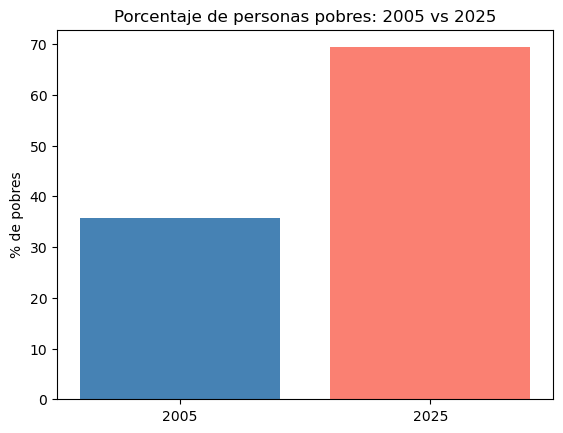

In [289]:
#comparacion en porcentage de pobres entre 2005 y 2025 -  A NIVEL PERSONA

import matplotlib.pyplot as plt

plt.bar(tabla["Año"].astype(str), tabla["% Pobres"], color=["steelblue","salmon"])
plt.ylabel("% de pobres")
plt.title("Porcentaje de personas pobres: 2005 vs 2025")
plt.show()


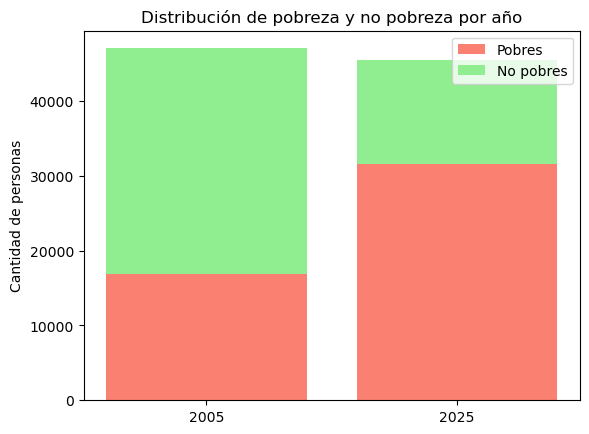

In [290]:
#distribucion de pobre vs no pobre por ano -- A NIVEL PERSONA

# datos apilados
plt.bar(["2005","2025"], tabla["Pobres"], label="Pobres", color="salmon")
plt.bar(["2005","2025"], tabla["No pobres"],
        bottom=tabla["Pobres"], label="No pobres", color="lightgreen")

plt.ylabel("Cantidad de personas")
plt.title("Distribución de pobreza y no pobreza por año")
plt.legend()
plt.show()
